<a href="https://colab.research.google.com/github/hunn99/PCVK_Ganjil_2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODUL 6 – Histogram, Histogram Equalization, Dithering

## TUGAS PRAKTIKUM

In [1]:
# 1 accessing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2 import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io, exposure
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

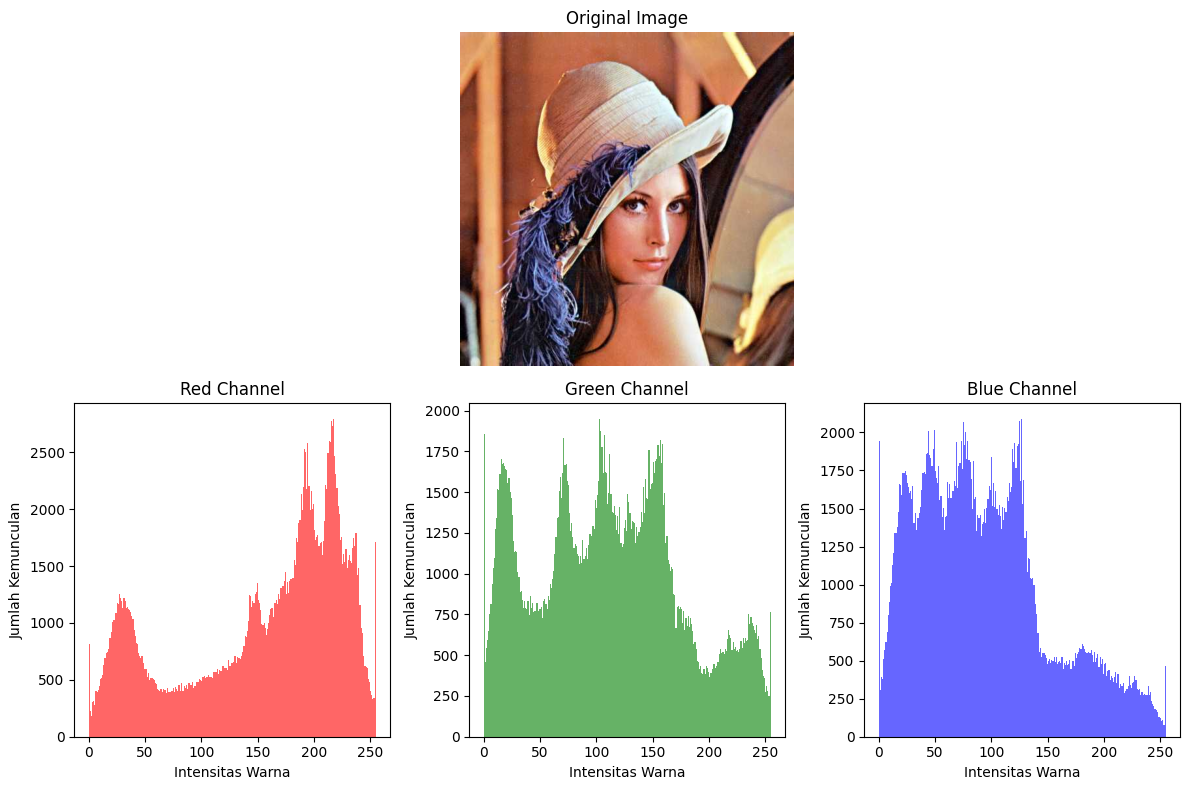

In [5]:
# 3 histogram citra
img_path = "/content/drive/MyDrive/PCVK/lena.jpg"

# input image
img = io.imread(img_path)

# memisahkan kanal RGB
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# penjelasan flatten()
# flatten() digunakan pada array atau struktur data berbentuk multidimensi untuk mengubahnya menjadi array satu dimensi (1D).
# ex: array_2d = np.array([[1, 2, 3], [4, 5, 6]])
# ouput: [1 2 3 4 5 6]

# membuat plot gambar
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# membuat plot histogram untuk setiap kanal warna di baris kedua
plt.subplot(2, 3, 4)
plt.hist(red_channel, bins=256, color='red', alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 5)
plt.hist(green_channel, bins=256, color='green', alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 6)
plt.hist(blue_channel, bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# menampilkan plot
plt.tight_layout()
plt.show()

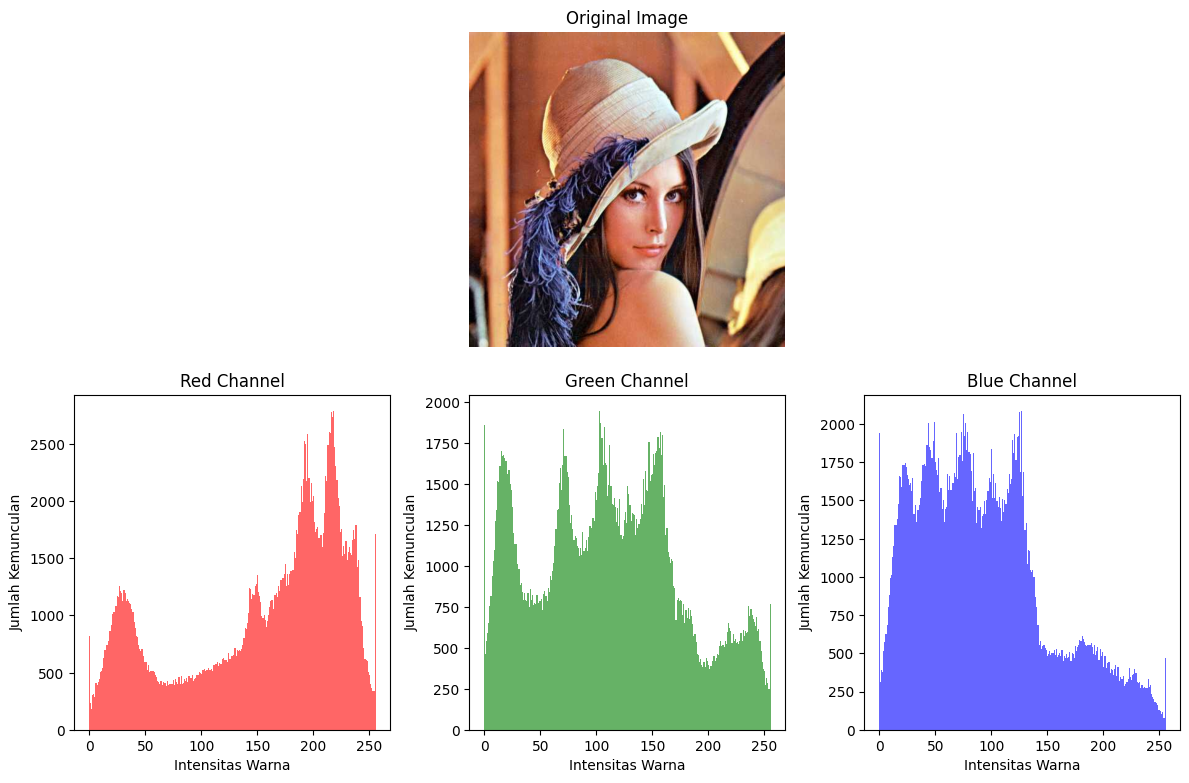

In [6]:
# 4 library yang dimiliki oleh NumPy yaitu “histogram”
img_path = "/content/drive/MyDrive/PCVK/lena.jpg"

# input image
img = io.imread(img_path)

# memisahkan kanal RGB
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# menggunakan numpy.histogram untuk membuat histogram RGB
red_hist_np, red_bins_np = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist_np, green_bins_np = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist_np, blue_bins_np = np.histogram(blue_channel, bins=256, range=(0, 256))

# membuat layout
plt.figure(figsize=(12, 8))

# menampilkan gambar asli
plt.subplot(2, 3, 2)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# membuat histogram untuk masing-masing kanal warna di baris kedua
plt.subplot(2, 3, 4)
plt.bar(red_bins_np[:-1], red_hist_np, color='red', alpha=0.6, width=1)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 5)
plt.bar(green_bins_np[:-1], green_hist_np, color='green', alpha=0.6, width=1)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 6)
plt.bar(blue_bins_np[:-1], blue_hist_np, color='blue', alpha=0.6, width=1)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

plt.hist() dan np.histogram() menghasilkan hasil yang mirip karena prinsipnya sama, tapi cara penggunaannya berbeda. plt.hist() secara otomatis membuat dan menampilkan histogram, serta memberikan tampilan yang lebih halus. Sementara itu, np.histogram() hanya menghitung data dan kita perlu menampilkan histogramnya sendiri dengan plt.bar().

<ipython-input-7-77536b568cf1>:105: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


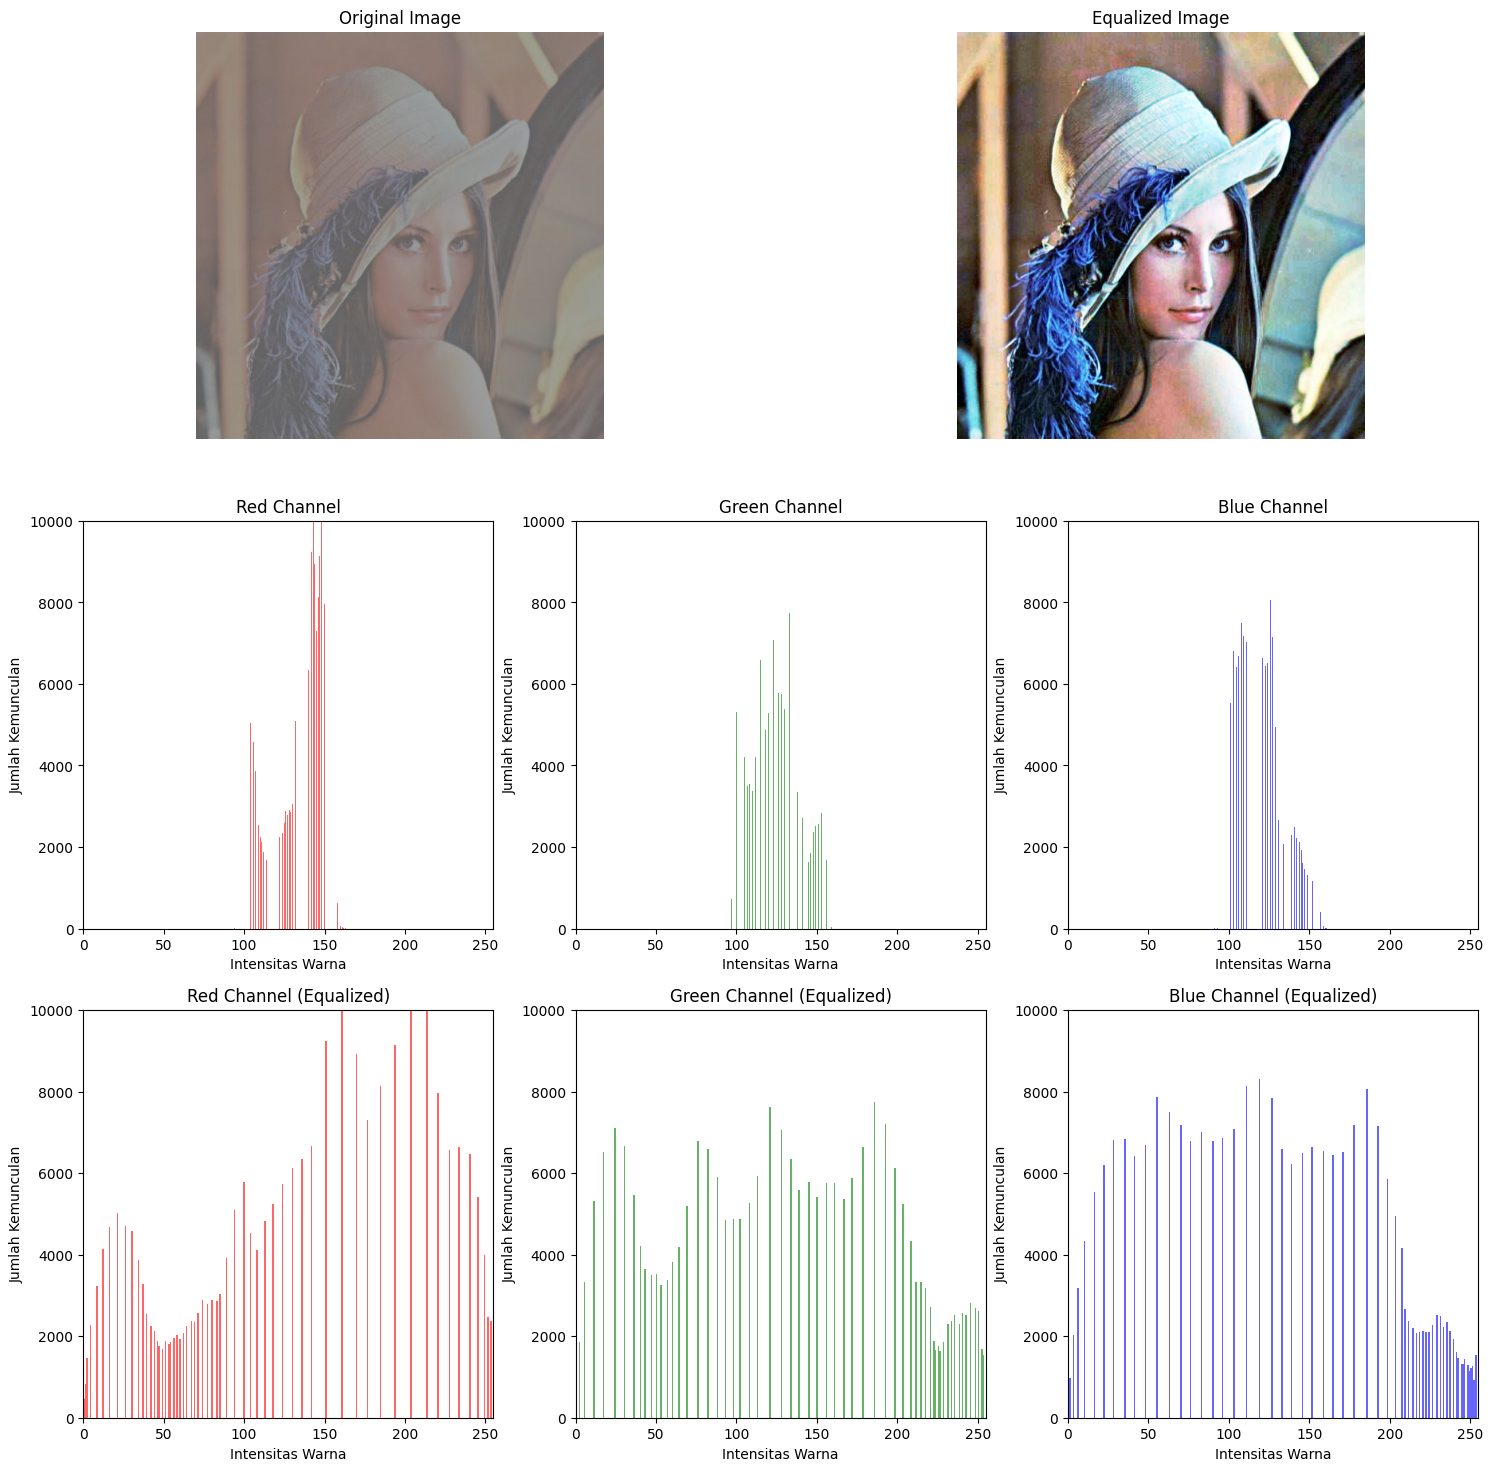

In [7]:
# 5 histogram citra seperti output histogram equalization
img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"

# input image
img = io.imread(img_path)

# menghitung jumlah kemunculan setiap pixel warna (frekuensi)
# Untuk citra RGB, kita akan menghitung frekuensi untuk setiap channel
red_freq, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_freq, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_freq, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# menghitung penjumlahan kumulatif dari frekuensi
red_cumulative = np.cumsum(red_freq)
green_cumulative = np.cumsum(green_freq)
blue_cumulative = np.cumsum(blue_freq)

# Normalisasi kumulatif frekuensi
num_pixels = img.shape[0] * img.shape[1]
red_cumulative_normalized = (red_cumulative / num_pixels) * 255
green_cumulative_normalized = (green_cumulative / num_pixels) * 255
blue_cumulative_normalized = (blue_cumulative / num_pixels) * 255

# Implementasi rumus histogram equalization (skala warna)
red_equalized = red_cumulative_normalized[img[:, :, 0]]
green_equalized = green_cumulative_normalized[img[:, :, 1]]
blue_equalized = blue_cumulative_normalized[img[:, :, 2]]

# membangun citra hasil histogram equalization
equalized_img = np.zeros_like(img)
equalized_img[:, :, 0] = red_equalized.astype(np.uint8)
equalized_img[:, :, 1] = green_equalized.astype(np.uint8)
equalized_img[:, :, 2] = blue_equalized.astype(np.uint8)

# menampilkan hasil
plt.figure(figsize=(18, 18))

# menampilkan gambar sebelum dan sesudah histogram equalization di baris pertama
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img)
plt.axis('off')
plt.title('Equalized Image')

# membuat histogram untuk gambar asli di baris kedua
plt.subplot(3, 3, 4)
plt.hist(img[:, :, 0].ravel(), bins=256, color='red', alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)  # mengatur rentang sumbu x
plt.ylim(0, 10000)
plt.margins(0.5)  # mengatur rentang sumbu y

plt.subplot(3, 3, 5)
plt.hist(img[:, :, 1].ravel(), bins=256, color='green', alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 6)
plt.hist(img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

# membuat histogram untuk gambar yang telah diequalisasi di baris ketiga
plt.subplot(3, 3, 7)
plt.hist(equalized_img[:, :, 0].ravel(), bins=256, color='red', alpha=0.6)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 8)
plt.hist(equalized_img[:, :, 1].ravel(), bins=256, color='green', alpha=0.6)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 9)
plt.hist(equalized_img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.tight_layout()
plt.show()

<ipython-input-8-11db318794f8>:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 4)


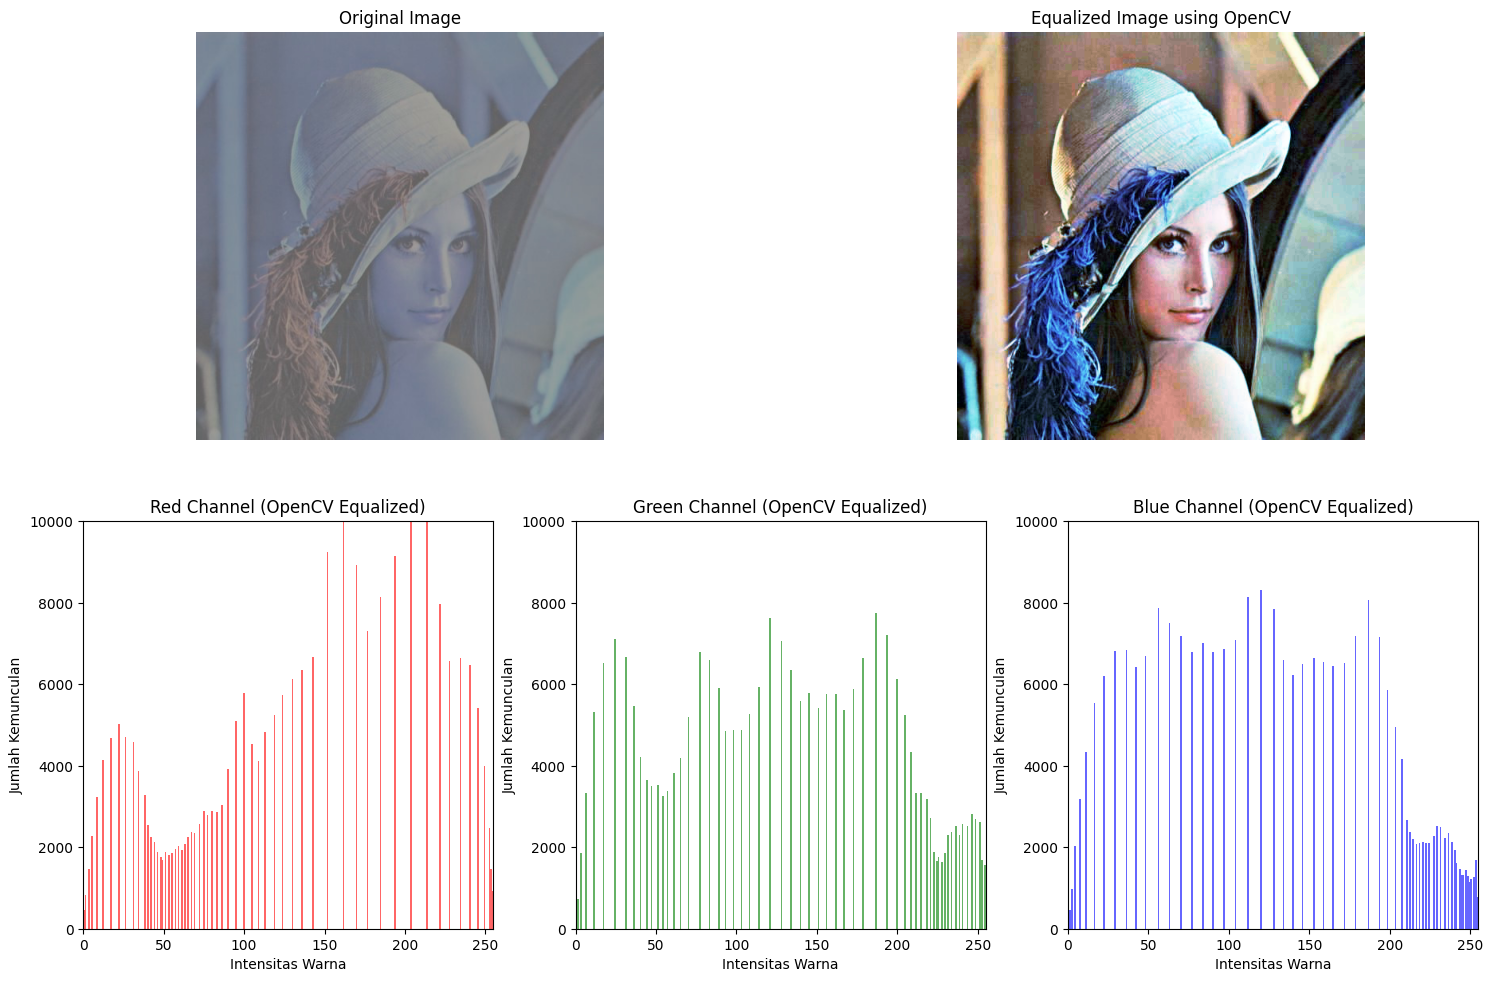

In [8]:
# 6 library yang dimiliki oleh CV2 yaitu “equalizeHist”
img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"

# input image
img = cv.imread(img_path)

# Split channels BGR
blue_channel, green_channel, red_channel = cv.split(img)

# Equalize histogram untuk setiap channel menggunakan OpenCV
blue_equalized_cv = cv.equalizeHist(blue_channel)
green_equalized_cv = cv.equalizeHist(green_channel)
red_equalized_cv = cv.equalizeHist(red_channel)

# Merge kembali channel yang sudah diequalisasi
equalized_img_cv = cv.merge([blue_equalized_cv, green_equalized_cv, red_equalized_cv])

# Mengonversi kembali ke RGB untuk tampilan matplotlib
equalized_img_cv_rgb = cv.cvtColor(equalized_img_cv, cv.COLOR_BGR2RGB)

# Menampilkan hasil untuk citra asli dan hasil equalisasi
plt.figure(figsize=(18, 18))

# Gambar asli
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# Gambar hasil equalisasi manual
plt.subplot(3, 2, 2)
plt.imshow(equalized_img)
plt.axis('off')
plt.title('Equalized Image using OpenCV')

# Gambar hasil equalisasi dengan OpenCV
plt.subplot(3, 2, 3)
plt.imshow(equalized_img_cv_rgb)
plt.axis('off')
plt.title('Equalized Image (OpenCV equalizeHist)')

# Membuat histogram untuk gambar hasil equalisasi dengan OpenCV
plt.subplot(3, 3, 4)
plt.hist(red_equalized_cv.ravel(), bins=256, color='red', alpha=0.6)
plt.title('Red Channel (OpenCV Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(3, 3, 5)
plt.hist(green_equalized_cv.ravel(), bins=256, color='green', alpha=0.6)
plt.title('Green Channel (OpenCV Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(3, 3, 6)
plt.hist(blue_equalized_cv.ravel(), bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel (OpenCV Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

# plt.tight_layout()
plt.show()

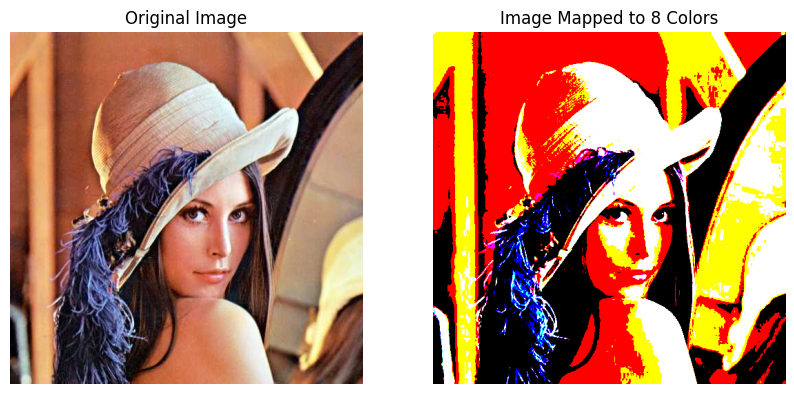

In [9]:
# 7 proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih
img_path = "/content/drive/MyDrive/PCVK/lena.jpg"
img = io.imread(img_path)

# mendefinisikan 8 warna dasar (RGB)
color_palette = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'yellow': np.array([255, 255, 0])
}

# function untuk menghitung jarak antara 2 nilai RGB
def calculate_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk melihat warna pixel terdekat dengan yang sudah didefinisikan
def map_color_to_palette(pixel, palette):
    min_distance = float('inf')
    nearest_color = None

    # Compare distance of pixel to each color in the palette
    for color_name, color_value in palette.items():
        distance = calculate_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_value

    return nearest_color

# membuat copy untuk output
mapped_img = np.zeros_like(img)

# perulangan untuk tiap pixel untuk dirubah ke warna terdekat
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_img[i, j] = map_color_to_palette(img[i, j], color_palette)

# membuat canvas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.axis('off')
plt.title('Image Mapped to 8 Colors')

plt.show()

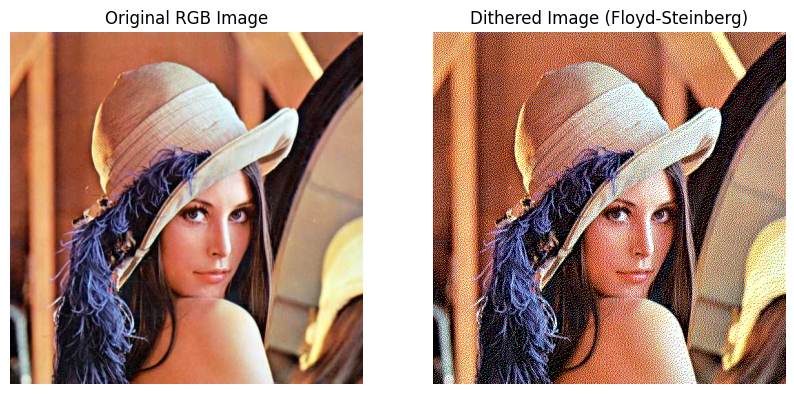

In [10]:
# 8  proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering)
img_path = "/content/drive/MyDrive/PCVK/lena.jpg"
img = io.imread(img_path)

#  Floyd-Steinberg Dithering untuk RGB
def floyd_steinberg_dithering_rgb(image):
    # Copy image to avoid modifying original image
    img = image.copy().astype(np.float32)  # Konversi ke float untuk penanganan error yang lebih akurat
    h, w, c = img.shape

    # Iterasi setiap channel (R, G, B)
    for y in range(h):
        for x in range(w):
            for channel in range(c):  # Lakukan proses di setiap channel (0=Red, 1=Green, 2=Blue)
                old_pixel = img[y, x, channel]
                new_pixel = np.round(old_pixel / 255) * 255  # Aproksimasi ke 0 atau 255 (warna biner)
                img[y, x, channel] = new_pixel
                error = old_pixel - new_pixel  # Error kuantisasi

                # Sebarkan error ke pixel-pixel tetangga
                if x + 1 < w:
                    img[y, x + 1, channel] += error * 7 / 16
                if y + 1 < h:
                    if x > 0:
                        img[y + 1, x - 1, channel] += error * 3 / 16
                    img[y + 1, x, channel] += error * 5 / 16
                    if x + 1 < w:
                        img[y + 1, x + 1, channel] += error * 1 / 16
    return img.astype(np.uint8)  # Kembalikan hasil sebagai uint8 untuk citra yang valid

# Lakukan dithering pada gambar RGB
dithered_img_rgb = floyd_steinberg_dithering_rgb(img)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

# Tampilkan gambar asli (RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original RGB Image')

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_img_rgb)
plt.axis('off')
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()

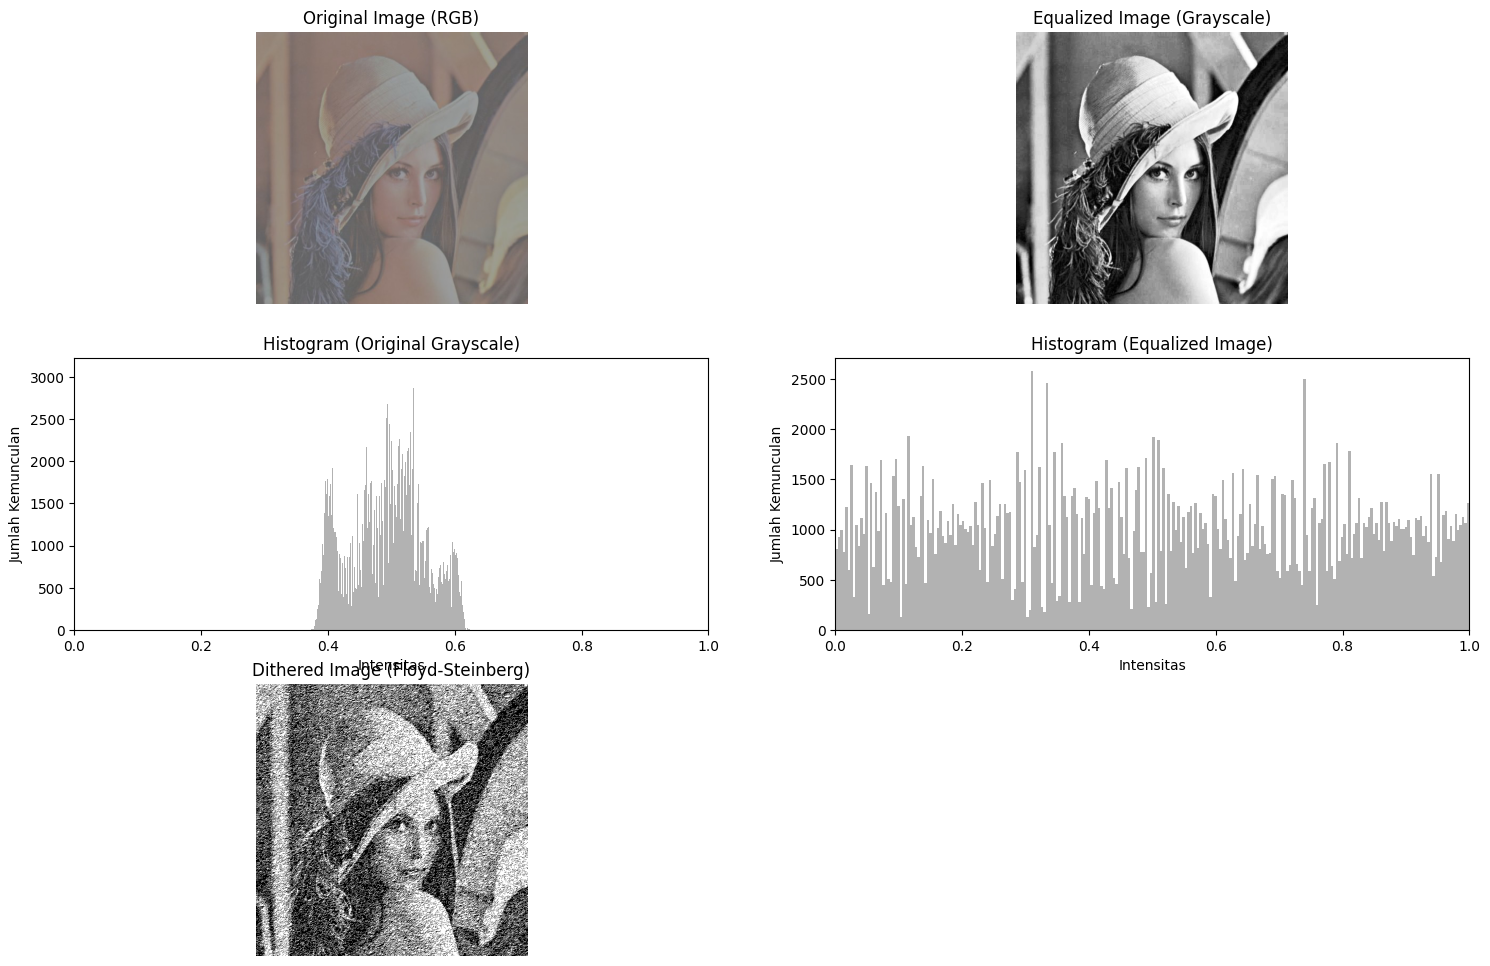

In [11]:
# 9 rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra
img_path = "/content/drive/MyDrive/PCVK/lena_lc.jpg"
img = io.imread(img_path)
from skimage import color

gray_img = color.rgb2gray(img)

equalized_img = exposure.equalize_hist(gray_img)

# def floyd_steinberg_dithering_gray(image):
#     img = image.copy() * 255  # Scale image to range 0-255
#     img = img.astype(np.float32)  # Convert to float for better error handling
#     h, w = img.shape

#     for y in range(h):
#         for x in range(w):
#             old_pixel = img[y, x]
#             new_pixel = np.round(old_pixel / 255) * 255  # Approximate to 0 or 255
#             img[y, x] = new_pixel
#             quant_error = old_pixel - new_pixel

#             if x + 1 < w:
#                 img[y, x + 1] += quant_error * 7 / 16
#             if y + 1 < h:
#                 if x > 0:
#                     img[y + 1, x - 1] += quant_error * 3 / 16
#                 img[y + 1, x] += quant_error * 5 / 16
#                 if x + 1 < w:
#                     img[y + 1, x + 1] += quant_error * 1 / 16

#     return np.clip(img, 0, 255).astype(np.uint8)  # Clip to valid pixel range and convert to uint8

def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255  # Scale image to range 0-255
    img = img.astype(np.float32)  # Convert ke float untuk lebih kompleks
    h, w = img.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Approximate to 0 or 255
            img[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x + 1] += quant_error * error_weights[0]  # Right
            if y + 1 < h:
                if x > 0:
                    img[y + 1, x - 1] += quant_error * error_weights[1]  # Below left
                img[y + 1, x] += quant_error * error_weights[2]  # Below
                if x + 1 < w:
                    img[y + 1, x + 1] += quant_error * error_weights[3]  # Below right

    return np.clip(img, 0, 255).astype(np.uint8)  # Clip to valid pixel range and convert to uint8



dithered_img = floyd_steinberg_dithering(equalized_img, error_weights = (1.0, 0.8, 0.7, 0.5))

plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image (Grayscale)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Original Grayscale)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram (Equalized Image)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 1)

plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

# plt.tight_layout()
plt.show()